# Notebook 1: Convolutional Maps

In [79]:
# Load neccessary python modules
from skimage import io, color
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import signal
from ipywidgets import interact 

from IPython.display import Audio, display
import soundfile as sf
import numpy as np
import sys

def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

## Blurring an Image

Lets explore bluring images using a kernel. A **kernel** is a matrix that can be used for image processing, such as blurring. To blur an image using a kernel we will preform a convolution between a kernel and an image. A **convolution** is a mathematical operation on two functions (in this case our two matrices) that produces a third function (our blurred image).

A **matrix** is a rectangular array of numbers arranged in horizontal rows and vertical columns. Below is an example of a (4,4) matrix of all ones. 

In [80]:
np.ones((4,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

Lets import an image of a butterfly that we can work with.

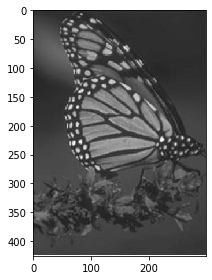

In [81]:
# Load image
butterfly = io.imread('../butterfly.jpg');

#convert to gray scale color map
gray_butterfly = color.rgb2gray(butterfly)

# Show image
plt.figure(); io.imshow(gray_butterfly)

Now we will use *np.random.rand* to create a random (5,5) matrix that we can use as our kernel to blur the butterfly image. Try running the cell below a few times and you will see that each time it outputs a different randomly produced matrix.

In [85]:
random_matrix = np.random.rand(5,5)
random_matrix 

array([[0.35325419, 0.22147767, 0.18103938, 0.59576093, 0.76982341],
       [0.73050334, 0.61592692, 0.67472684, 0.44905333, 0.9843036 ],
       [0.81958368, 0.09885263, 0.41229946, 0.17176247, 0.39886021],
       [0.14063646, 0.90313181, 0.22642415, 0.46667265, 0.69259474],
       [0.25777677, 0.01326885, 0.71457903, 0.37538093, 0.71459165]])

Now we will convolve the image with the random matrix. To do this, we will use *signal.convolve2d* imported from the scipy library. 

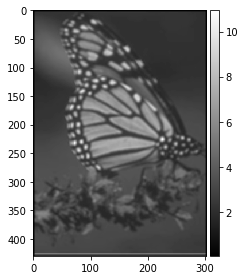

In [86]:
#using signal.convolve2d to blur butterfly
blurred_butterfly = signal.convolve2d(gray_butterfly, random_matrix)

#show blurred image
io.imshow(blurred_butterfly, cmap='gray')

What would happen if we used a larger or smaller random matrix to blur the image? Move the widget below find out. What do you notice?

In [87]:
def SquareKernel(matrix_size):
    return np.random.rand(matrix_size, matrix_size)

def AdjustKernelRadius(matrix_size):
    fim = signal.convolve2d(gray_butterfly, SquareKernel(matrix_size))
    io.imshow(fim, cmap='gray')
interact(AdjustKernelRadius, matrix_size=(1,20))

interactive(children=(IntSlider(value=10, description='matrix_size', max=20, min=1), Output()), _dom_classes=(…

<function __main__.AdjustKernelRadius(matrix_size)>

-----

## Edge Detection 

We begin the process by defining a function, that as its name suggests, converts an image's gradient by returning the dot product of an image's rgb values (a matrix) with an array.

In [40]:
# Not exactly sure how to describe what the function does to the image 
# since it doesn't actually result in grayscale?

In [29]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

Now, let's see the matrix that comprises the image that we are working with in this lab, and then see the image itself in the cell after.

In [58]:
lenna = plt.imread('Lenna.jpg')
lenna

array([[[223, 134, 118],
        [225, 134, 116],
        [226, 135, 117],
        ...,
        [184, 101, 111],
        [202, 119, 129],
        [221, 138, 148]],

       [[224, 133, 115],
        [225, 134, 116],
        [225, 134, 115],
        ...,
        [197, 115, 129],
        [185, 103, 117],
        [171,  89, 103]],

       [[223, 132, 114],
        [223, 132, 114],
        [224, 133, 114],
        ...,
        [140,  58,  80],
        [119,  37,  59],
        [ 94,  12,  34]],

       ...,

       [[ 86,  35,  68],
        [ 92,  31,  65],
        [105,  34,  66],
        ...,
        [103,  23,  48],
        [116,  33,  59],
        [124,  42,  65]],

       [[ 85,  34,  67],
        [ 90,  29,  63],
        [103,  32,  64],
        ...,
        [120,  37,  63],
        [131,  49,  72],
        [142,  58,  82]],

       [[ 82,  31,  64],
        [ 87,  26,  60],
        [100,  29,  61],
        ...,
        [130,  48,  71],
        [144,  60,  84],
        [157,  72,  95]]

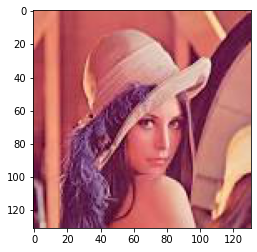

In [39]:
plt.imshow(lenna)

Its also worth noting the shape of the Lenna file.

In [59]:
lenna.shape

(131, 131, 3)

Right now, it is (131, 131, 3). This means that it is a nested matrix with 131 separate matrices within the file, and each of those matrices are 131 by 3 in shape (131 rows, 3 columns).

For the rest of this lab, we'll be working with the lenna.jpg file passed into the function we defined earlier.

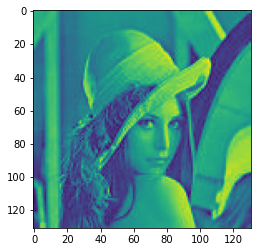

In [60]:
lenna = rgb2gray(lenna)
plt.imshow(lenna)

You should notice that the shape after the function's dot product operation is now (131, 131).

In [63]:
lenna.shape

(131, 131)

The following lines of code is creating matrices of different rgb values to convolve the lenna image with. If you want to see what Gx and Gy look like in terms of their rgb values, uncomment the cell after this one and run it.

In [68]:
Gx = np.zeros ((3, 3))
Gy = np.zeros((3, 3))
Gx = [[1,  2, 1], [0,  0,  0], [-1, -2, -1]]
Gy = [[1,  0,  -1],  [2, 0, -2],  [1, 0, -1]]

In [72]:
# plt.subplot(2, 2, 1)
# plt.imshow(Gx)
# plt.show()

In [73]:
# plt.subplot(2, 2, 1)
# plt.imshow(Gy)
# plt.show()

Now, let's convolve Lenna with Gy and Gx, and then find the gradient between the new convolved lennaY and lennaX. Finding this gradient is key to the notion of edge detection, which will be more obvious soon.

In [84]:
lennaY = signal.convolve2d (lenna, Gy)
lennaX = signal.convolve2d (lenna, Gx)

In [85]:
gradient = np.sqrt(np.square(lennaX) + np.square(lennaY))
gradient *= 255.0 / gradient.max()

Let's take a look at the color scheme that we've convolved with Lenna.

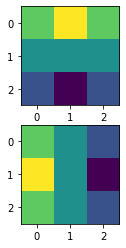

In [86]:
plt.figure(1) # identifier for this specific plot
plt.subplot(2, 1, 1)
plt.imshow (Gx)
plt.subplot(2, 1, 2)
plt.imshow (Gy)

And now, let's take a look at the original lenna file again, and then the lennaX and lennaY we computed using scipy's signal package.

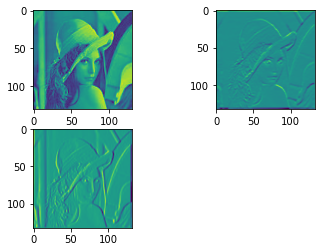

In [88]:
plt.figure(2)
plt.subplot(2, 2, 1)
plt.imshow (lenna)
plt.subplot(2, 2, 2)
plt.imshow (lennaX)
plt.subplot(2, 2, 3)
plt.imshow (lennaY)

And finally, we can use the gradient that we computed between lennaX and lennaY to detect and visually represent the edges of the original lenna file.

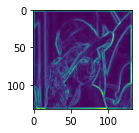

In [90]:
plt.subplot(2, 2, 4)
plt.imshow (gradient)
plt.show()

## Convolution Reverb


We'll start by loading in the two sound files we will be working with. The first recording, `anechoic1.wav`, is an anechoic (echo-free) orchestral recording of the Overture from Mozart's The Marriage of Figaro.  The second sound file, `Concertgebouw-m.wav`, is a recording from the Concert Gebouw, a concert hall in Amsterdam, Netherlands. The second sound file which will serve as our "impulse response." It captures the acoustics of the concert hall, which we can then simulate in the first file through convolution.

In [45]:
x, srx = sf.read('assets/anechoic1.wav')
h, srh = sf.read('assets/Concertgebouw-m.wav')
print(x.shape, srx)
print(h.shape, srx)        

assert srx == srh, 'sample rate must be the same in both files'

(456621,) 44100
(225298,) 44100


Run the cell below to take a listen to the two audio files.

In [25]:
display(Audio('assets/anechoic1.wav'))
display(Audio('assets/Concertgebouw-m.wav'))

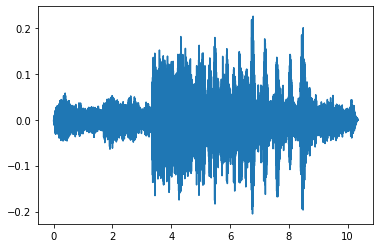

In [49]:
import matplotlib.pyplot as plt

## TODO: get proper y axis units
plt.plot(np.linspace(0, x.shape[0]/srx, num=x.shape[0]), x)

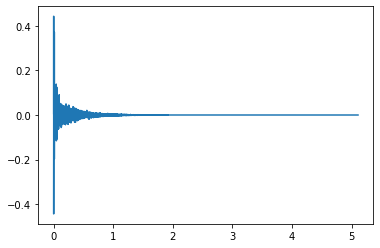

In [50]:
plt.plot(np.linspace(0, h.shape[0]/srh, h.shape[0]), h)

-----

Convolution with signals (sounds) is similar to convolution with images as we worked above. With signals, convolution can be thought of a signal sliding over another, or the weighted sum of the shifted copies of one function over all of its "space." Loosely, it is of the form

$$ y(n) = \sum_{-\infty}^{\infty} x(n)h(n) $$


With sound files, our domain becomes time which enables us to use the Convolution Theorem. The theorem states that convolution in the time domain is the same as complex multiplication in the frequency domain. In other words, we can multiply their frequency content (spectra) in the frequency domain. So, 

$$ y(t) = x(t) * h(t) = X(k)H(k) $$ 

where $X(k)$ and $H(k)$ are the Fourier Transforms of the time signals $x$ and $h$. 

In order to make the most of the Convolution Theorem, we use a Fast Fourier Transform (FFT) to transform our sound files into the frequency domain. We can then multiply the two transformed signals (which is equivalent to convolution by the theorem), and transform the multiplied signal back to the time domain, resulting in the convolved sound. 

Because FFT works best when the input size is a power of 2,  we'll first find the  closest power of 2 of the larger of the two files. 

In [80]:
if x.shape[0] > h.shape[0]:
    N = next_power_of_2(x.shape[0])
else:
    N = next_power_of_2(h.shape[0])     
N

524288

Now that we have `N`, we can use the FFT algorithm to transform the signals. The function `np.fft.rfft()` takes in two parameters:
* `x` and `h`: the input signal
* `N`: The number of points to use in the input

We'll assign the transformed `x` and `h` signals to Xk and Hk, respectively.

In [85]:
Xk = np.fft.rfft(x, N)
Hk = np.fft.rfft(h, N)

Now, by the Convolution Theorem, we can multiply the two signals, which are in the frequency domain, and take the inverse FFT. The resulting convolved signal, `y`, is back in the time domain.

In [89]:
y = np.fft.irfft(Xk * Hk)
y

array([0.00271174, 0.00257238, 0.00244476, ..., 0.00283547, 0.00279619,
       0.00275774])

In [107]:
# TODO: add some interactivity: how does changing `scale` affect the end result?
scale = .3

y *= scale

In [103]:
# TODO: add some interactivity: how does changing `direct` affect the end result?
direct = 0

y[0:x.shape[0]] += x * direct

In [104]:
print("saving data")
save_dir = "outverb.wav"
sf.write(save_dir, y, srx)
print("end")

Audio(save_dir)

saving data
end
